<a href="https://colab.research.google.com/github/AngelaCorvino/BrainAge/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression models**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

Read the data set and add a feature "Site" which is the acquisition site


In [4]:

dataset_file = 'https://raw.githubusercontent.com/AngelaCorvino/BrainAge/main/BrainAge/data/FS_features_ABIDE_males.csv'
df = pd.read_csv(dataset_file,sep=';')
df.FILE_ID
df.FILE_ID[0].split('_')[0]
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])

Divede the data set in ASD and TD and check their shape


In [5]:
df_ASD=df.loc[df.DX_GROUP==1]
df_TD=df.loc[df.DX_GROUP==-1]
df_ASD.size
df_TD.shape

(464, 425)

Devide the TD data set in train and test

In [6]:
train_set, test_set = train_test_split(df_TD, test_size = 0.3)

# Linear Regression
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

# One feauture
We can hypothesize that there is a linear dependence, for example, of cortical thickness on the subject's age. The question is: Is it possible to predict a person's age from his cortical thickness?

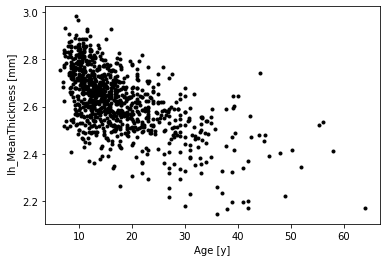

In [7]:
plt.scatter(df.AGE_AT_SCAN, df.lh_MeanThickness, color='black', marker='.')
plt.xlabel('Age [y]')
plt.ylabel(' lh_MeanThickness [mm]')
plt.show()


In [13]:
model=LinearRegression()
x_train =pd.DataFrame(data=train_set, columns=['lh_MeanThickness'])
x_test =pd.DataFrame(data=test_set, columns=['lh_MeanThickness'])
y_train = train_set['AGE_AT_SCAN']
y_test= test_set['AGE_AT_SCAN']
model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

5.903944383835433
4.544836134828654


.score returns the coefficient of determination R^2 of the prediction. The best possible score is 1.0

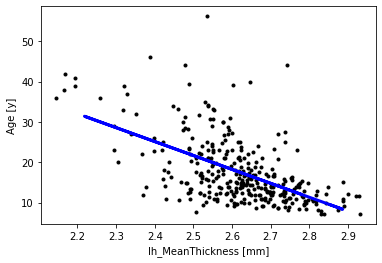

In [14]:
plt.scatter(x_train, y_train,  color='black', marker='.')
plt.plot(x_test, predict_y, color='blue', linewidth=3)
plt.xlabel(f'{x_test.columns[0]} [mm]')
plt.ylabel('Age [y]')
plt.show()

# Two feautures 

[-3.60406533e+01  6.26230867e-06] 107.30953007180534
0.38355526068302226


Text(0.5, 0, 'y_train')

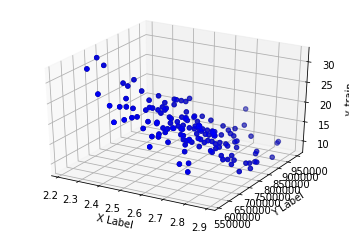

In [15]:
features= [ 'lh_MeanThickness','TotalGrayVol',
       ]
x_train = train_set[features]
x_test = test_set[features]
y_train = train_set['AGE_AT_SCAN']
y_test = test_set['AGE_AT_SCAN']
model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(model.coef_,model.intercept_)
loss = model.score(x_test, y_test)
print(loss )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
#ax.scatter(x_test.lh_MeanThickness, x_test.rh_MeanThickness, Y_, color='black')
#ax.scatter(x_test_M.lh_MeanThickness, x_test.rh_MeanThickness, Y_fit_M, color='blue')

ax.scatter(x_test.lh_MeanThickness, x_test.TotalGrayVol, predict_y, color='black')
ax.scatter(x_test.lh_MeanThickness, x_test.TotalGrayVol, predict_y, color='blue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('y_train')



In [16]:
# Import dependencies

import plotly
import plotly.graph_objs as go

# Configure the traces for data points and fit.
trace_data = go.Scatter3d(
    x=x_test.lh_MeanThickness,
    y=x_test.TotalGrayVol,
#    y=X_feat_M.TotalGrayVol, # you can try with different features, e.g. TotalGrayVol
    z=y_test,
    mode='markers',
    marker={
        'size': 3,
        'opacity': 0.8,
    },
    name='Data points'
)

trace_fit = go.Scatter3d(
    x=x_test.lh_MeanThickness,
    #y=X_feat_M.rh_MeanThickness,
    y=x_test.TotalGrayVol,
    z=predict_y,
    mode='markers',
    marker={
        'size': 3,
        'opacity': 0.8,
    },
        name='Fitted data'
)
# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    scene= {
    #"xaxis":{'title':'lh_MeanThickness'},
    "yaxis":{'title':'rh_MeanThickness'},
    "yaxis":{'title':'TotalGrayVol'},
    "zaxis":{'title':'Age'}
    }
)

data = [trace_data, trace_fit]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plot_figure.show()

# **Multiple feautures**

In [ ]:
features = [ 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol', 'CSF_Volume_mm3',
       ]

In [ ]:
x_train = train_set[features]
x_test = test_set[features]
y_train = train_set['AGE_AT_SCAN']
y_test = test_set['AGE_AT_SCAN']

In [ ]:
plt.scatter(df.AGE_AT_SCAN, df.TotalGrayVol, color='black', marker='.')
plt.xlabel('Age [y]')
plt.ylabel(' TotalGrayVol [mm^3]')
plt.show()


In [ ]:
plt.scatter(df.AGE_AT_SCAN, df.CSF_Volume_mm3, color='black', marker='.')
plt.xlabel('Age [y]')
plt.ylabel(' CSF Volume [mm^3]')
plt.ylim([0,2000])
plt.show()

# Linear Regression

In [ ]:
model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

# Gaussian Regression

In [ ]:
model=GaussianProcessRegressor()
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

# Polynomial regression 

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                      ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

# Pipeline
All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('scaler', StandardScaler()),
                      ('poly', PolynomialFeatures(degree=2)),
                      ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

In [ ]:
from scipy.stats import pearsonr
plt.figure(figsize=(10,10))
p_value = pearsonr(test_array,predict_array)
rmse = np.sqrt(mean_squared_error(test_array, predict_array))
r2 = r2_score(test_array, predict_array)
plt.scatter(test_array,predict_array,c='y')
plt.xlabel('Ground truth Age(years)')
plt.ylabel('Predicted Age(years)')
plt.title('Ground-truth Age versus Predict Age using \n \
            Gaussian Regression ')
plt.plot(np.linspace(15,80,100),np.linspace(15,80,100), c='r', label='Expected prediction line')
offset = 20
plt.text(10, 80+offset, f'Mean Absolute Error={round(loss_array.mean(),3)}',fontsize=14)
plt.text(10, 75+offset, f'Pearson correlation coefficient:{round(p_value[0],3)}',fontsize=14)
plt.text(10, 70+offset, f'R Squared:{round(r2,3)}',fontsize=14)
plt.text(10, 65+offset, f'RMSE:{round(rmse,3)}',fontsize=14)

plt.legend()
plt.show()

# ** Feautures according to correlation to AGE AT SCAN **


In [30]:
agecorr_TD=df_TD.corr()['AGE_AT_SCAN'] #we acces to the column relative to age
listoffeatures=agecorr_TD[np.abs(agecorr_TD)>0.5].keys()
listoffeatures = listoffeatures.drop('AGE_AT_SCAN')

x_train = train_set[listoffeatures]
x_test = test_set[listoffeatures]
y_train = train_set['AGE_AT_SCAN']
y_test = test_set['AGE_AT_SCAN']
x_train

,lh_cuneus_ThickAvg,lh_inferiorparietal_ThickAvg,lh_lingual_ThickAvg,lh_paracentral_ThickAvg,lh_posteriorcingulate_ThickAvg,lh_precuneus_ThickAvg,lh_superiorfrontal_ThickAvg,rh_cuneus_ThickAvg,rh_inferiorparietal_ThickAvg,rh_lingual_ThickAvg,rh_paracentral_ThickAvg,rh_precuneus_ThickAvg,rh_superiorfrontal_ThickAvg,rh_superiorparietal_ThickAvg,lh_MeanThickness,rh_MeanThickness
362,2.017,2.710,2.116,2.813,2.905,2.832,3.116,1.942,2.882,2.259,2.655,2.696,3.119,2.537,2.73636,2.72066
328,1.873,2.526,2.318,2.669,2.560,2.469,2.842,1.947,2.580,2.212,2.609,2.446,2.796,2.318,2.59622,2.58908
356,2.257,2.848,2.219,2.972,2.833,2.741,3.224,2.369,2.923,2.475,3.011,2.723,3.042,2.656,2.92109,2.89589
433,1.920,2.485,2.010,2.739,2.620,2.529,2.804,1.952,2.494,2.089,2.458,2.428,2.761,2.322,2.59144,2.57268
357,2.238,2.622,2.399,2.602,2.708,2.548,2.780,2.103,2.668,2.461,2.581,2.538,2.750,2.308,2.62217,2.67714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,1.659,2.278,1.777,2.282,2.195,2.270,2.700,1.674,2.358,1.814,2.521,2.203,2.722,2.110,2.32160,2.34610
26,1.905,2.485,1.809,2.566,2.533,2.557,2.877,1.879,2.485,1.971,2.444,2.468,2.801,2.195,2.53883,2.51947
312,2.105,2.573,2.241,2.799,2.573,2.598,2.860,2.241,2.732,2.157,2.772,2.673,2.876,2.482,2.65512,2.65963
454,1.458,2.165,1.717,2.078,2.085,2.025,2.576,1.611,2.350,1.861,2.063,2.134,2.619,2.037,2.25862,2.31800


As the features (i.e. volume and thickness measures) are in different ranges of values, we rescale them column-wise to have all them in the same range. We can apply a z-score transform, i.e. with the sklearn.StandardScaler or other normalization transforms, e.g the sklearn.RobustScaler, which removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [32]:

x_train= StandardScaler().fit_transform(x_train)
x_test= StandardScaler().fit_transform(x_test)
x_train

array([[-0.33770375,  0.68783714, -0.40918338, ...,  1.13498975,
         0.89479589,  0.77235756],
       [-1.0816438 , -0.3433737 ,  0.68904232, ..., -0.14465326,
        -0.14725038, -0.21740058],
       [ 0.90219633,  1.46124526,  0.15080299, ...,  1.83032088,
         2.26840233,  2.09045543],
       ...,
       [ 0.11692628, -0.07996658,  0.27041173, ...,  0.81361822,
         0.29071541,  0.31328369],
       [-3.22563768, -2.36656452, -2.57845096, ..., -1.78656963,
        -2.65756021, -2.25649189],
       [ 0.19958628,  0.04333037, -0.85499777, ..., -0.75818073,
         0.16951265,  0.14569127]])

Linear Regression


In [34]:

model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

5.084216212386739
4.064835668084952


# **K-Fold**
The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm on a dataset.
The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held-back test set, whilst all other folds collectively are used as a training dataset.
The k-fold cross-validation procedure can be implemented easily using the scikit-learn machine learning library.
We will evaluate a Linear model and use the KFold class to perform the cross-validation, configured to shuffle the dataset and set k=10, a popular default.

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

We define a function which implements the k-fold CV, computes and averages the AUC values over the folds and provides plots of the ROC curve.

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
from numpy import interp
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [48]:
def plot_cv_roc(X, y, classifier, n_splits=5, scaler=None):
  """
  plot_cv_roc trains the classifier on X data with y labels, implements the
  k-fold-CV with k=n_splits, may implement a feature scaling function.
  It plots the ROC curves for each k fold and their average and displays 
  the corresponding AUC values and the standard deviation over the k folders.
  """
  if scaler:
    model = Pipeline([('scaler', scaler()),
                    ('classifier', classifier)])
  else:
    model = classifier

  try:
    y = y.to_numpy()
    X = X.to_numpy()
  except AttributeError:
    pass
    
  cv = StratifiedKFold(n_splits)

  tprs = [] #True positive rate
  aucs = [] #Area under the ROC Curve
  interp_fpr = np.linspace(0, 1, 100)
  plt.figure()
  i = 0
  for train, test in cv.split(X, y):
    probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
#      print(f"{fpr} - {tpr} - {thresholds}\n")
    interp_tpr = interp(interp_fpr, fpr, tpr)
    tprs.append(interp_tpr)
    
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i += 1
  plt.legend()
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.show()

  plt.figure()
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(interp_fpr, mean_tpr)
  std_auc = np.std(aucs)
  plt.plot(interp_fpr, mean_tpr, color='b',
          label=f'Mean ROC (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})',
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(interp_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.xlabel('False Positive Rate',fontsize=18)
  plt.ylabel('True Positive Rate',fontsize=18)
  plt.title('Cross-Validation ROC of SVM',fontsize=18)
  plt.legend(loc="lower right", prop={'size': 15})
  plt.show()



In [49]:
X = df_TD[listoffeatures]
y = df_TD['AGE_AT_SCAN']
X = StandardScaler().fit_transform(X)
print(y)
classifier = SVC(kernel='linear', probability=True)
plot_cv_roc(X,y, classifier, 5, scaler=RobustScaler)

15     44.20
16     39.30
17     42.50
18     19.70
19     27.90
       ...  
890    14.17
891    10.92
892    14.00
893    15.25
894    12.33
Name: AGE_AT_SCAN, Length: 464, dtype: float64


ValueError: ignored

<Figure size 432x288 with 0 Axes>